In [ ]:
import tensorflow as tf
import keras
import matplotlib as mpl
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_names = ["leg_data_test_front_mat", "leg_data_test_neg_45_degree", "leg_data_test_pos_45_degree", "leg_data_test_neg_90_degree", "leg_data_test_pos_90_degree", "leg_data_test_0_degree", "leg_data_test_back_mat"]
data_frames = {}

for name in file_names:
  substring_name = name[14:]
  data_frames[substring_name] = pd.read_csv(f'/content/drive/MyDrive/Pressure Sensor/Previous Data/{name}.csv')


In [ ]:
data_frames

{'front_mat':          f1   f2   f3   f4   f5   f6
 0       915  871  806  767  717   97
 1       910  868  806  751  720  103
 2       898  875  803  757  722   99
 3       910  859  792  764  717   99
 4       895  870  808  750  717   98
 ...     ...  ...  ...  ...  ...  ...
 228489  913  870  803  795  735  114
 228490  908  872  811  810  738  109
 228491  913  875  809  787  740  112
 228492  895  879  814  802  738  114
 228493  909  875  809  790  726  110
 
 [228494 rows x 6 columns],
 'neg_45_degree':          b1   b2   b3   b4   b5   b6
 0       412  855  882  831  876  369
 1       411  852  885  825  882  363
 2       406  852  885  827  879  363
 3       408  847  893  825  878  364
 4       420  856  891  826  876  363
 ...     ...  ...  ...  ...  ...  ...
 228440  452  857  894  833  884  352
 228441  457  847  893  835  884  335
 228442  455  861  888  831  875  336
 228443  462  864  893  833  878  340
 228444  452  855  881  837  874  342
 
 [228445 rows x 6 columns]

In [ ]:
# Rename all column names
for key, df in data_frames.items():
    df.columns = ["f1", "f2", "f3", "f4", "f5", "f6"]
# Add 'label' column to each DataFrame for good fit and bad fit
data_frames['0_degree']['fit'] = 'good'

i = 0;
for key, df in data_frames.items():
  if key != '0_degree':
      df['Fit'] = 'bad'
  df["Experiment"] = key #Add label for dataset taken from
  i += 1

data_frames

{'front_mat':          f1   f2   f3   f4   f5   f6  Fit Experiment
 0       915  871  806  767  717   97  bad  front_mat
 1       910  868  806  751  720  103  bad  front_mat
 2       898  875  803  757  722   99  bad  front_mat
 3       910  859  792  764  717   99  bad  front_mat
 4       895  870  808  750  717   98  bad  front_mat
 ...     ...  ...  ...  ...  ...  ...  ...        ...
 228489  913  870  803  795  735  114  bad  front_mat
 228490  908  872  811  810  738  109  bad  front_mat
 228491  913  875  809  787  740  112  bad  front_mat
 228492  895  879  814  802  738  114  bad  front_mat
 228493  909  875  809  790  726  110  bad  front_mat
 
 [228494 rows x 8 columns],
 'neg_45_degree':          f1   f2   f3   f4   f5   f6  Fit     Experiment
 0       412  855  882  831  876  369  bad  neg_45_degree
 1       411  852  885  825  882  363  bad  neg_45_degree
 2       406  852  885  827  879  363  bad  neg_45_degree
 3       408  847  893  825  878  364  bad  neg_45_degree
 4

In [ ]:
# Concatenate all DataFrames into a new DataFrame
all_data = pd.concat(list(data_frames.values()), ignore_index=True)
all_data

,f1,f2,f3,f4,f5,f6,Fit,Experiment,fit
0,915,871,806,767,717,97,bad,front_mat,NaN
1,910,868,806,751,720,103,bad,front_mat,NaN
2,898,875,803,757,722,99,bad,front_mat,NaN
3,910,859,792,764,717,99,bad,front_mat,NaN
4,895,870,808,750,717,98,bad,front_mat,NaN
...,...,...,...,...,...,...,...,...,...
1599280,874,864,868,895,865,71,bad,back_mat,NaN
1599281,884,876,872,890,872,73,bad,back_mat,NaN
1599282,883,871,877,896,866,80,bad,back_mat,NaN
1599283,892,875,876,896,868,73,bad,back_mat,NaN


In [ ]:
label_encoder = LabelEncoder()
all_data['Fit'] = label_encoder.fit_transform(all_data['Fit'])
all_data

,f1,f2,f3,f4,f5,f6,Fit,Experiment,fit
0,915,871,806,767,717,97,0,front_mat,NaN
1,910,868,806,751,720,103,0,front_mat,NaN
2,898,875,803,757,722,99,0,front_mat,NaN
3,910,859,792,764,717,99,0,front_mat,NaN
4,895,870,808,750,717,98,0,front_mat,NaN
...,...,...,...,...,...,...,...,...,...
1599280,874,864,868,895,865,71,0,back_mat,NaN
1599281,884,876,872,890,872,73,0,back_mat,NaN
1599282,883,871,877,896,866,80,0,back_mat,NaN
1599283,892,875,876,896,868,73,0,back_mat,NaN


In [ ]:
fit_types = all_data['Fit']

# Display unique fit types
unique_fit_types = fit_types.unique()
print(unique_fit_types)

[0 1]


In [ ]:
X = all_data.iloc[:, :-3]  # Extract the features (f1 through f6)
y = all_data['Fit']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#validation (15% of training) - can do it w in built

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279428, 6)
y_train shape: (1279428,)
X_test shape: (319857, 6)
y_test shape: (319857,)


In [ ]:
# Normalize the training set using Min-Max scaling
# or standardize (try both)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Use the same normalization parameters to normalize the testing set
X_test_normalized = scaler.transform(X_test)

# Convert the normalized arrays back to DataFrames
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train_normalized_df.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_normalized_df.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1279428, 6)
y_train shape: (1279428,)
X_test shape: (319857, 6)
y_test shape: (319857,)


In [ ]:
# Build the Keras Sequential model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    Dense(64, activation='relu'), # relu gives non linearity - (middle layers usually relu, output smth different)
    Dense(2, activation='softmax')  # Output layer with 2 nodes (good and bad)
])

# Compile the model - set up
# adam is default
# goal is to minimize loss - for multi categorial use sparse categorical
# use binary for loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Train the model
# validation and accuracy curve should be similar
# if overfitting then lower epochs or increase batch_size, start w 100 or 200 epoch size
# spreadsheet w accuracy
model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
31986/31986 [==============================] - 75s 2ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 2.7682e-06 - val_accuracy: 1.0000
Epoch 2/10
31986/31986 [==============================] - 81s 3ms/step - loss: 6.7878e-05 - accuracy: 1.0000 - val_loss: 2.5501e-06 - val_accuracy: 1.0000
Epoch 3/10
31986/31986 [==============================] - 77s 2ms/step - loss: 1.1967e-04 - accuracy: 1.0000 - val_loss: 3.7297e-07 - val_accuracy: 1.0000
Epoch 4/10
31986/31986 [==============================] - 73s 2ms/step - loss: 6.9262e-05 - accuracy: 1.0000 - val_loss: 6.9770e-08 - val_accuracy: 1.0000
Epoch 5/10
31986/31986 [==============================] - 74s 2ms/step - loss: 1.6719e-05 - accuracy: 1.0000 - val_loss: 6.3956e-08 - val_accuracy: 1.0000
Epoch 6/10
31986/31986 [==============================] - 76s 2ms/step - loss: 1.8620e-05 - accuracy: 1.0000 - val_loss: 1.8446e-08 - val_accuracy: 1.0000
Epoch 7/10
31986/31986 [==============================] - 84s 3ms/step - l

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4738 (18.51 KB)
Trainable params: 4738 (18.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the model on the testing set
# visualize training and validation curve

loss, accuracy = model.evaluate(X_test_normalized, y_test)
print('Test accuracy:', accuracy)

9996/9996 [==============================] - 15s 2ms/step - loss: 6.2115e-09 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
31986/31986 [==============================] - 81s 3ms/step - loss: 6.2873e-05 - accuracy: 1.0000 - val_loss: 3.2106e-09 - val_accuracy: 1.0000
Epoch 2/10
31986/31986 [==============================] - 73s 2ms/step - loss: 2.5619e-06 - accuracy: 1.0000 - val_loss: 1.1622e-09 - val_accuracy: 1.0000
Epoch 3/10
31986/31986 [==============================] - 71s 2ms/step - loss: 5.4137e-05 - accuracy: 1.0000 - val_loss: 9.0795e-10 - val_accuracy: 1.0000
Epoch 4/10
31986/31986 [==============================] - 72s 2ms/step - loss: 8.9427e-06 - accuracy: 1.0000 - val_loss: 1.2606e-07 - val_accuracy: 1.0000
Epoch 5/10
31986/31986 [==============================] - 73s 2ms/step - loss: 3.3259e-06 - accuracy: 1.0000 - val_loss: 1.5027e-08 - val_accuracy: 1.0000
Epoch 6/10
31986/31986 [==============================] - 79s 2ms/step - loss: 1.4974e-05 - accuracy: 1.0000 - val_loss: 3.2499e-09 - val_accuracy: 1.0000
Epoch 7/10
31986/31986 [==============================] - 70s 2ms/step

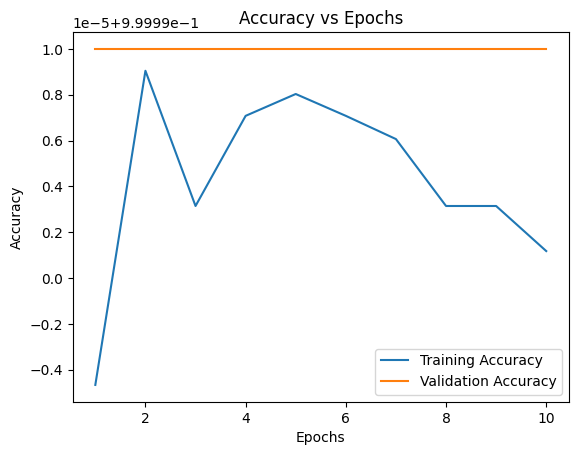

In [ ]:
# Access training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot accuracy vs epochs
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()


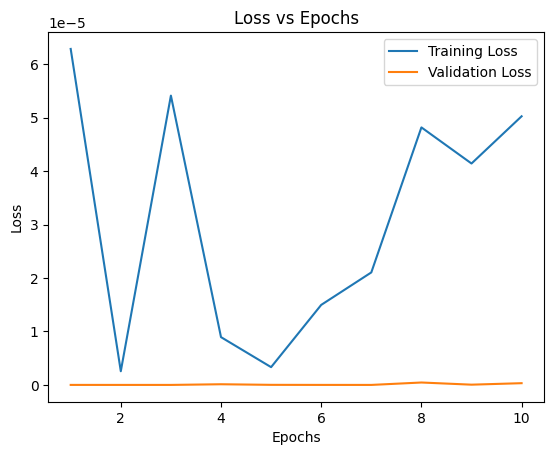

In [ ]:
# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss vs epochs
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()